<a href="https://colab.research.google.com/github/among5094/Big-Data-Integrated-Analysis/blob/main/week13_CH11_K-NN%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0/week13_CH11_K_NN%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CH11장 k-nn을 이용한 분류
06월 02일 월요일

## 11.01 K-최근접 이웃

In [3]:
from sklearn.neighbors import KNeighborsClassifier
x_train = [[0], [1], [2], [3]]
y_train = [0, 0, 1, 1] # 클래스 종류가 2개(0 또는 1)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
print(f'클래스의 종류: {neigh.classes_}')
print(f'거리 계산 방법: {neigh.effective_metric_}')
print(f'훈련 데이터 샘플 수: {neigh.n_samples_fit_}')


클래스의 종류: [0 1]
거리 계산 방법: euclidean
훈련 데이터 샘플 수: 4


원두맛에 대한

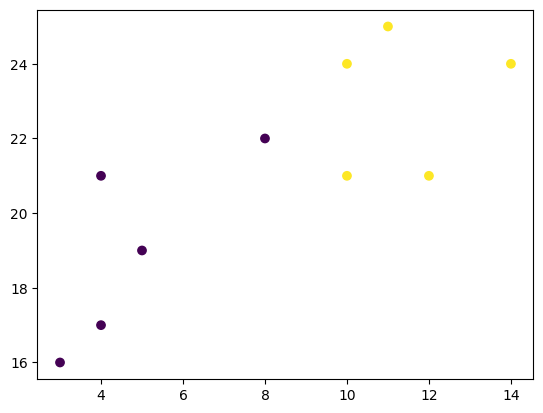

[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (8, 22), (10, 21), (12, 21)]


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# x,y가 데이터이고, classes가 분류 데이터임
x = [4, 5, 10, 4, 3, 11, 14, 8, 10, 12] # 산미
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21] # 고소함
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

plt.style.use('default')
plt.scatter(x, y, c=classes)
plt.show()

data = list(zip(x, y)) # x랑 y를 묶어
print(data)


[0]


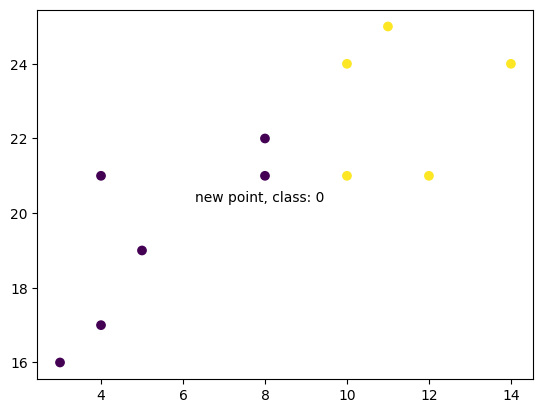

In [5]:
# k=1일 때
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(data, classes)
new_x = 8
new_y = 21
new_point = [[new_x, new_y]]
prediction = knn.predict(new_point)
print(prediction)

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

[1]


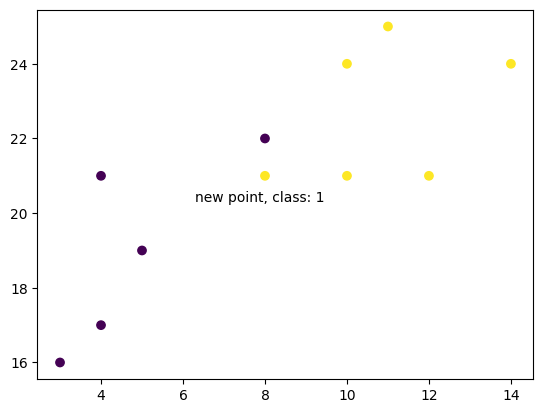

In [6]:
# k=5 일 때
# new_x = 8
# new_y = 21

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(data, classes)
prediction = knn.predict(new_point)
print(prediction)

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

- 이렇게 k의 값에 따라서 같은 데이터라도 결과가 달라진다!
- k=1일 때는 0으로 분류됐었고, k=5일 때는 1로 분류됨.
- 그래서 최적의 k를 찾기 위해 교차검증이 필요함

In [7]:
# 원두커피를 분류하는 예에서 최적의 k찾기

from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier()
scores = cross_val_score(knn, data, classes, cv=3, scoring='accuracy')
for i in range(scores.size):
    print(f"{i+1}번째 정확도: {scores[i]}")

1번째 정확도: 1.0
2번째 정확도: 1.0
3번째 정확도: 0.6666666666666666


- k는 첫번째 값(1)을 제외한 홀수개수(k=3,5,7...)로 한다.


표준화 작업의 2가지
1. z-점수 표준화 -> StandardScaler
2. 최대-최소 표준화 -> MinMaxScaler

In [10]:
# 1번 z-점수 표준화
import pandas as pd
import numpy as np

df = pd.DataFrame({'x1' : np.arange(11), 'x2' : np.arange(11) ** 2})
df

,x1,x2
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16
5,5,25
6,6,36
7,7,49
8,8,64
9,9,81


In [11]:
# 2번 최대-최소 표준화
import pandas as pd
import numpy as np

df = pd.DataFrame({'x1' : np.arange(11), 'x2' : np.arange(11) ** 2})
df

,x1,x2
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16
5,5,25
6,6,36
7,7,49
8,8,64
9,9,81


## 11.02 K-NN을 이용한 인기 영화 분류

In [12]:
from google.colab import drive
drive.mount('/content/Drive/')

Mounted at /content/Drive/


In [15]:
#  임포트하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

df = pd.read_csv('/content/Drive/MyDrive/data/chap11_movie_genre_final.csv')
df.head(3)

,id,original_title,target,vote_average,Action,Adventure,Fantasy,ScienceFiction,Crime,Drama,...,Mystery,History,War,Music,Documentary,Foreign,TVMovie,director,cast,keywords
0,19995,Avatar,7,7.2,1,1,1,1,0,0,...,0,0,0,0,0,0,0,James Cameron,"SamWorthington,SigourneyWeaver,StephenLang,Zoe...","['culture clash', 'future', 'space war', 'spac..."
1,285,Pirates of the Caribbean: At World's End,7,6.9,1,1,1,0,0,0,...,0,0,0,0,0,0,0,Gore Verbinski,"JohnnyDepp,KeiraKnightley,OrlandoBloom,Stellan...","['ocean', 'drug abuse', 'exotic island', 'east..."
2,206647,Spectre,6,6.3,1,1,0,0,1,0,...,0,0,0,0,0,0,0,Sam Mendes,"ChristophWaltz,DanielCraig,LéaSeydoux,RalphFie...","['spy', 'based on novel', 'secret agent', 'seq..."


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4775 entries, 0 to 4774
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4775 non-null   int64  
 1   original_title  4775 non-null   object 
 2   target          4775 non-null   int64  
 3   vote_average    4775 non-null   float64
 4   Action          4775 non-null   int64  
 5   Adventure       4775 non-null   int64  
 6   Fantasy         4775 non-null   int64  
 7   ScienceFiction  4775 non-null   int64  
 8   Crime           4775 non-null   int64  
 9   Drama           4775 non-null   int64  
 10  Thriller        4775 non-null   int64  
 11  Animation       4775 non-null   int64  
 12  Family          4775 non-null   int64  
 13  Western         4775 non-null   int64  
 14  Comedy          4775 non-null   int64  
 15  Romance         4775 non-null   int64  
 16  Horror          4775 non-null   int64  
 17  Mystery         4775 non-null   i

<ipython-input-16-2471a2f6b392>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['target'], bins=20)  # 빈 수치를 20으로 설정


Text(0.5, 1.0, 'movie count')

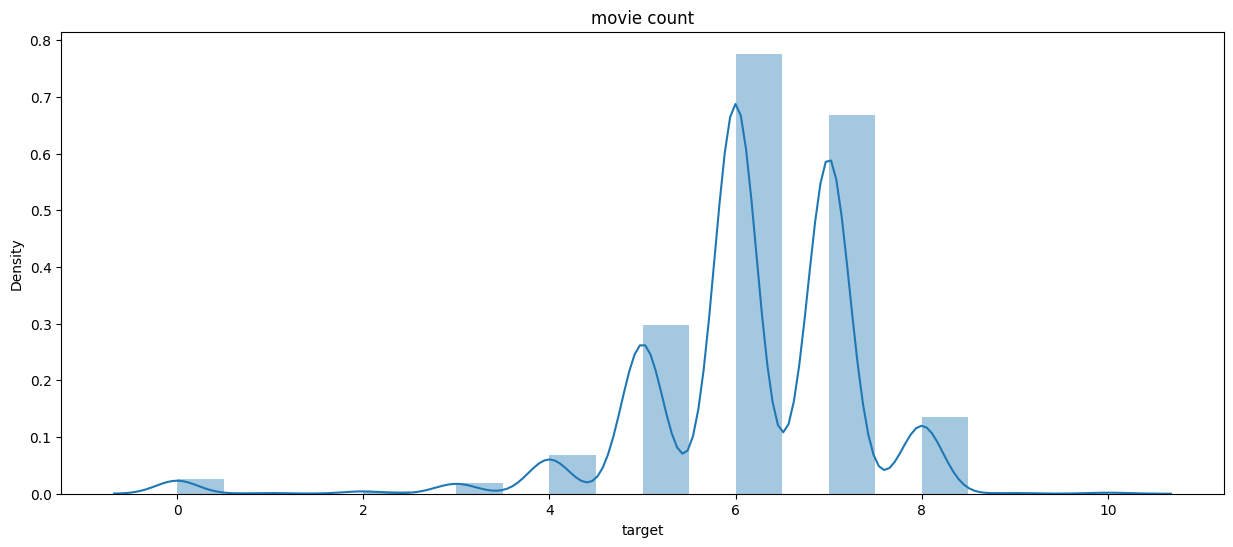

In [16]:
# 레이블에 따른 영화 수 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1, figsize=(15, 6))  # 그래프 사이즈
sns.distplot(df['target'], bins=20)  # 빈 수치를 20으로 설정
plt.title("movie count")

<ipython-input-17-75000ffb6050>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['vote_average'], bins=20)  # 빈 수치를 20으로 설정


Text(0.5, 1.0, 'vote_average')

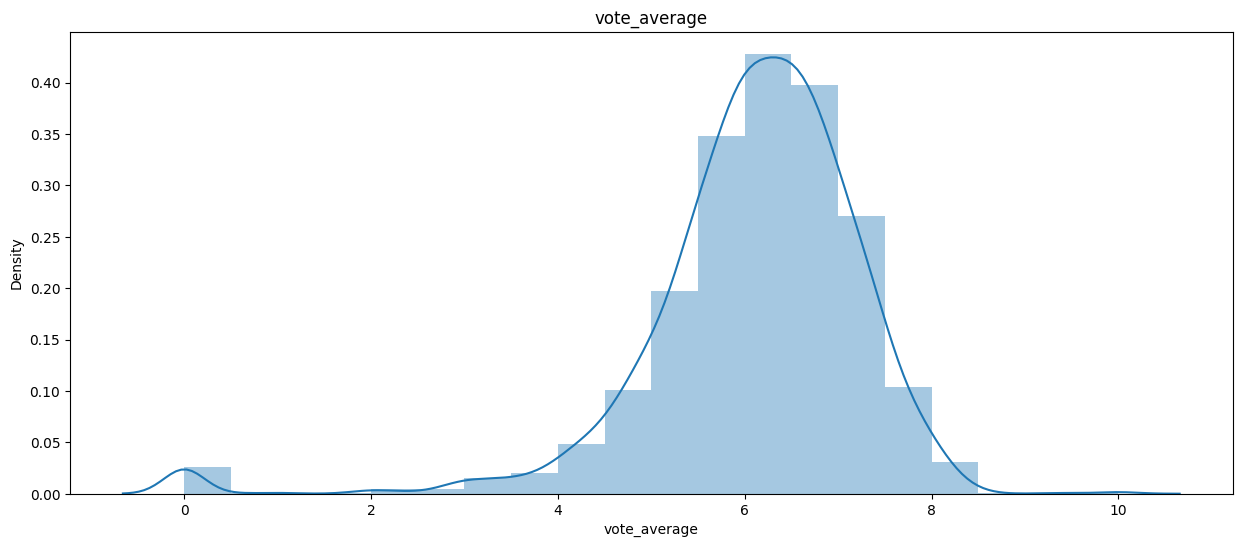

In [17]:
# 영화 평점
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1, figsize=(15, 6))  # 그래프 사이즈
sns.distplot(df['vote_average'], bins=20)  # 빈 수치를 20으로 설정
plt.title("vote_average")


In [24]:
print(df.columns)  # 칼럼명 확인하기

Index(['id', 'original_title', 'target', 'vote_average', 'Action', 'Adventure',
       'Fantasy', 'ScienceFiction', 'Crime', 'Drama', 'Thriller', 'Animation',
       'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery',
       'History', 'War', 'Music', 'Documentary', 'Foreign', 'TVMovie',
       'director', 'cast', 'keywords'],
      dtype='object')


In [25]:
# 장르별 분포

# 장르 리스트
genre_list = ['Action', 'Adventure', 'Fantasy', 'ScienceFiction',
              'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western',
              'Comedy', 'Romance', 'Horror', 'Mystery', 'History', 'War',
              'Music', 'Documentary', 'Foreign', 'TVMovie']

# 장르에 해당하는 영화 개수 리스트
count_list = []
for i in genre_list:
    count_list.append(len(df[df[i] == 1]))
count_list

[1140,
 786,
 421,
 535,
 691,
 2281,
 1270,
 232,
 512,
 81,
 1714,
 891,
 518,
 347,
 191,
 143,
 184,
 110,
 33,
 8]

Action : 1140
Adventure : 786
Fantasy : 421
ScienceFiction : 535
Crime : 691
Drama : 2281
Thriller : 1270
Animation : 232
Family : 512
Western : 81
Comedy : 1714
Romance : 891
Horror : 518
Mystery : 347
History : 191
War : 143
Music : 184
Documentary : 110
Foreign : 33
TVMovie : 8


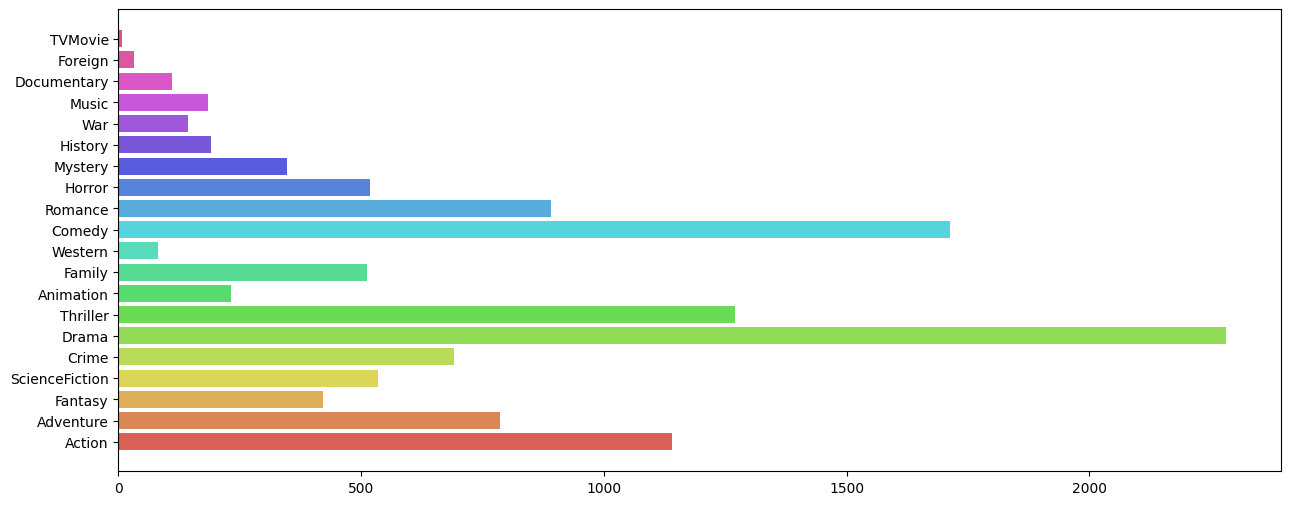

In [26]:
# 장르별 영화 분포 시각화 및 데이터 출력
plt.figure(1, figsize = (15, 6))  # 그래프 사이즈
plt.barh(genre_list, count_list, color=sns.color_palette('hls', 20))


for i in range(len(genre_list)):
    print(f'{genre_list[i]} : {count_list[i]}')

In [23]:
#높은 비중을 차지하는 4개의 영화 장르에서 평점이 6.5 이상인 영화의 수

temp = (df.Drama == 1) & (df.vote_average >= 6.5)
df[temp]
print(f'드라마 영화 2281편 중 평점 6.5 이상: {len(df[temp])}편')

temp = (df.Comedy == 1) & (df.vote_average >= 6.5)
df[temp]
print(f'코미디 영화 1714편 중 평점 6.5 이상: {len(df[temp])}편')

temp = (df.Thriller == 1) & (df.vote_average >= 6.5)
df[temp]
print(f'스릴러 영화 1270편 중 평점 6.5 이상: {len(df[temp])}편')

temp = (df.Action == 1) & (df.vote_average >= 6.5)
df[temp]
print(f'액션 영화 1140편 중 평점 6.5 이상: {len(df[temp])}편')


드라마 영화 2281편 중 평점 6.5 이상: 1208편
코미디 영화 1714편 중 평점 6.5 이상: 521편
스릴러 영화 1270편 중 평점 6.5 이상: 415편
액션 영화 1140편 중 평점 6.5 이상: 355편


In [27]:
# 훈련 데이터와 테스트 데이터 나누기

# x에 장르 데이터 넣기
x = df[['Action', 'Adventure', 'Fantasy', 'ScienceFiction', 'Crime',
        'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy',
        'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music',
        'Documentary', 'Foreign', 'TVMovie']]

# y에 타겟데이터
y = df[['target']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # 0.2는 테스트 데이터가 20%

print(x_train.shape)
print(x_test.shape)


(3820, 20)
(955, 20)


- 보통 k=1이면 과적합이다 (난 과소적합으로 생각함)
- k=1이면 단 1개의 이웃만 참고하므로 단 하나의 훈련데이터에 민감하게 반응할 것임.
- 그래서 테스트 데이터에 일반화가 어려움

- 반대로 과소적합은 k가 너무 커질 때 발생한다.
- 대부분의 샘플이 평균화되어 모든 입력을 같은 클래스로 예측하게 될 수 있다.

In [31]:
# 모델을 학습하기 전에 cross_val_score()를 이용하여 최적의 K 구하기

from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier() # knn 객체 생성
scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')

for i in range(scores.size):
    print(f"{i+1}번째 정확도: {scores[i]}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


1번째 정확도: 0.36780104712041883
2번째 정확도: 0.362565445026178
3번째 정확도: 0.387434554973822
4번째 정확도: 0.387434554973822
5번째 정확도: 0.3704188481675393


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [29]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5) # k=5
neigh.fit(x_train, y_train) # 모델 학습
print(neigh.classes_)
print(f'거리계산방법: {neigh.effective_metric_}')
print(f'샘플수: {neigh.n_samples_fit_}')

[ 0  1  2  3  4  5  6  7  8  9 10]
거리계산방법: euclidean
샘플수: 3820


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [32]:
# 예측
print(neigh.score(x_test, y_test))

0.40523560209424087


In [33]:
# 평가
new_x = [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
prediction = neigh.predict([new_x])
prediction

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([6])

## 11.03 K-NN을 이용한 농구 선수 분류

In [34]:
# 데이터 불러오기
df = pd.read_csv('/content/Drive/MyDrive/data/chap11_basketball_final.csv')
df.head(3)

,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,4.1,1.9,0.4,0.4,1.3,0
1,2.4,3.7,1.1,0.5,1.6,0
2,2.2,1.0,0.5,0.3,1.0,0


In [39]:
# 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rebounds   1340 non-null   float64
 1   Assists    1340 non-null   float64
 2   Steals     1340 non-null   float64
 3   Blocks     1340 non-null   float64
 4   Turnovers  1340 non-null   float64
 5   Target     1340 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


Text(0.5, 1.0, 'player')

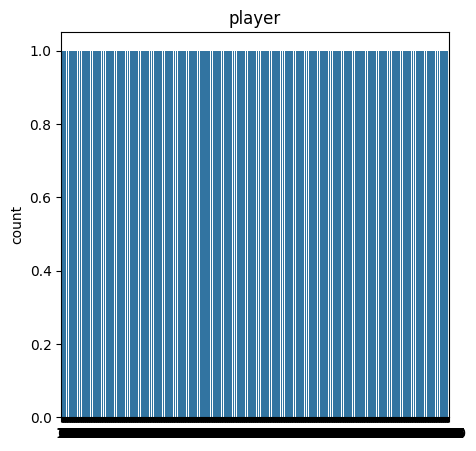

In [41]:
# 레이블(선수경력)에 따른 선수 수 확인하기
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1, figsize = (5, 5))  # 그래프 사이즈
sns.countplot(df['Target'])
plt.title("player")

In [42]:
# 경력별 선수의 특징
print(f"리바운드=df['Rebounds'].groupby(df['Target']).mean()")
print(f"어시스트=df['Assists'].groupby(df['Target']).mean()")
print(f"스틸=df['Steals'].groupby(df['Target']).mean()")
print(f"블록=df['Blocks'].groupby(df['Target']).mean()")
print(f"턴오버=df['Turnovers'].groupby(df['Target']).mean()")

리바운드=df['Rebounds'].groupby(df['Target']).mean()
어시스트=df['Assists'].groupby(df['Target']).mean()
스틸=df['Steals'].groupby(df['Target']).mean()
블록=df['Blocks'].groupby(df['Target']).mean()
턴오버=df['Turnovers'].groupby(df['Target']).mean()


In [43]:
x = df[['Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers']]
y = df[['Target']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print(x_train.shape)
print(x_test.shape)

(1072, 5)
(268, 5)


In [45]:
# 최적의 k 찾기
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier()
scores = cross_val_score(knn, x, y, cv=5, scoring='accuracy')
for i in range(scores.size):
    print(f"{i+1}번째 정확도: {scores[i]}")

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

1번째 정확도: 0.6455223880597015
2번째 정확도: 0.6156716417910447
3번째 정확도: 0.5708955223880597
4번째 정확도: 0.6082089552238806
5번째 정확도: 0.6455223880597015


In [46]:
# 모델의 생성과 학습
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(x_train, y_train)
print(neigh.classes_)
print(f'거리계산방법: {neigh.effective_metric_}')
print(f'샘플수: {neigh.n_samples_fit_}')

[0 1]
거리계산방법: euclidean
샘플수: 1072


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [47]:
# 예측
print(neigh.score(x_test, y_test))

0.6417910447761194


In [49]:
# 평가
new_x=[3,3,2,2,4]
prediction = neigh.predict([new_x])
print(prediction)

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
